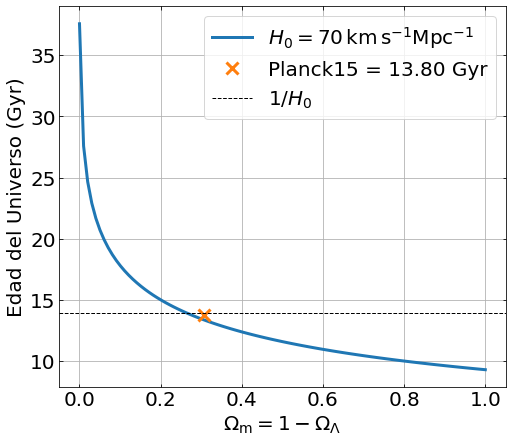

In [1]:
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM, Planck15
from astropy import units as u
from matplotlib import pyplot as plt, rcParams
import numpy as np

Om_rng = np.linspace(0, 1, 100)
H0 = 70 * u.km / u.s / u.Mpc
tH = (1 / H0).to(u.Gyr).value
age = np.zeros(Om_rng.size)
P15_age = Planck15.age(0).value

for i, Om in enumerate(Om_rng):
    cosmo = FlatLambdaCDM(H0, Om0=Om, Tcmb0=2.725*u.K)
    age[i] = cosmo.age(0).value # in Gyr

rcParams['font.size'] = 20
rcParams['lines.linewidth'] = 3
fig, ax = plt.subplots(figsize=(8,7))
ax.plot(Om_rng, age, label='$H_0=70\,\mathrm{km\,s^{-1}Mpc^{-1}}$')
ax.plot(Planck15.Om0, P15_age, 'C1x', ms=12, mew=3,
        label='Planck15 = {0:.2f} Gyr'.format(P15_age))
ax.axhline(tH, ls='--', color='k', lw=1, label='$1/H_0$')
ax.set_xlabel(r'$\Omega_\mathrm{m}=1-\Omega_\Lambda$')
ax.set_ylabel('Edad del Universo (Gyr)')
ax.grid(True)
ax.legend();